Try to use image processing algorithm to get the better estimation of xy to click

In [17]:
import requests
from math import sqrt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [18]:
#plt.rcParams["figure.figsize"] = (10,10)

In [19]:
wms_url = 'http://globalfloods-ows.ecmwf.int/glofas-ows/ows.py?'
wms_paras = {
    'SERVICE':'WMS',
    'REQUEST':'GetFeatureInfo',
    'FORMAT':'image/png',
    'VERSION':'1.3.0',
    'LAYERS':'RPG_U',
    'WIDTH':1020,
    'HEIGHT':678,
    'CRS':'EPSG:3857',
    'BBOX':'-13094904.603227489,2941622.234325256,-8105095.39677251,6258377.765674742',
    'INFO_FORMAT':'text/html',
    'QUERY_LAYERS':'RPG_U',
    'TRANSPARENT':True,
    'TIME':None,
    'I':456,
    'J':227
}
wms_paras['REQUEST']='GetMap'
# wms_paras['CRS']='EPSG:4326'
# wms_paras['BBOX'] = "-27,23,-2,42"
# resp = requests.get(wms_url, params=wms_paras)
# print(resp.url)
# Image(resp.content)
# test EPSG:3857
wms_paras['CRS']='EPSG:3857'
wms_paras['BBOX'] = '2560348.29,-3123471.75,4675418.61,-222684.21'
wms_paras['WIDTH']=600*2.5
wms_paras['HEIGHT']=800*2.5
resp = requests.get(wms_url, params=wms_paras)
print(resp.url)

http://globalfloods-ows.ecmwf.int/glofas-ows/ows.py?SERVICE=WMS&REQUEST=GetMap&FORMAT=image%2Fpng&VERSION=1.3.0&LAYERS=RPG_U&WIDTH=1500.0&HEIGHT=2000.0&CRS=EPSG%3A3857&BBOX=2560348.29%2C-3123471.75%2C4675418.61%2C-222684.21&INFO_FORMAT=text%2Fhtml&QUERY_LAYERS=RPG_U&TRANSPARENT=True&I=456&J=227


In [20]:
image_org=plt.imread(resp.url)

In [21]:
image_gray = rgb2gray(image_org)

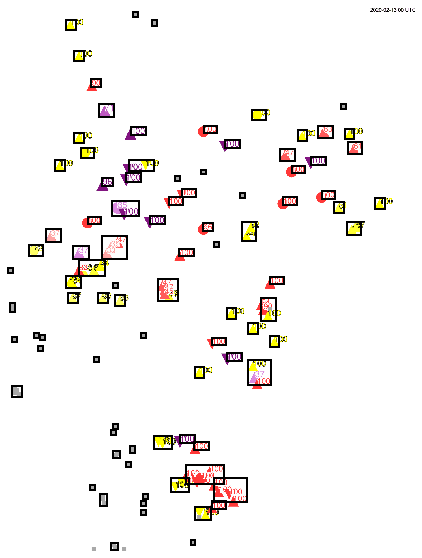

In [22]:
image=image_gray
thresh = threshold_otsu(image)
bw = closing(image > thresh , square(2))


# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots()
#ax.imshow(image_label_overlay)
ax.imshow(image_org)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 200:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='black', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
#plt.tight_layout()
plt.show()

In [40]:
#arealist = [region.area for region in regionprops(label_image) if region.area > 300]
#plt.hist(arealist,50)

In [35]:
for region in regionprops(label_image):
    if (region.area <=400) and (region.area >=200):
        print(region.area,region.bbox)

324 (18, 461, 36, 479)
342 (48, 532, 67, 550)
342 (357, 1226, 375, 1245)
342 (597, 713, 615, 732)
360 (620, 618, 639, 637)
342 (683, 855, 701, 874)
342 (863, 761, 882, 779)
342 (958, 3, 977, 21)
342 (1014, 389, 1032, 408)
342 (1198, 97, 1216, 116)
342 (1198, 492, 1216, 511)
324 (1206, 121, 1224, 139)
342 (1214, 18, 1232, 37)
360 (1246, 113, 1265, 132)
342 (1287, 318, 1305, 337)
342 (1532, 389, 1550, 408)
342 (1556, 382, 1575, 400)
324 (1673, 437, 1691, 455)
324 (1757, 303, 1775, 321)
342 (1790, 500, 1809, 518)
342 (1816, 492, 1834, 511)
342 (1850, 492, 1868, 511)
324 (1961, 674, 1979, 692)


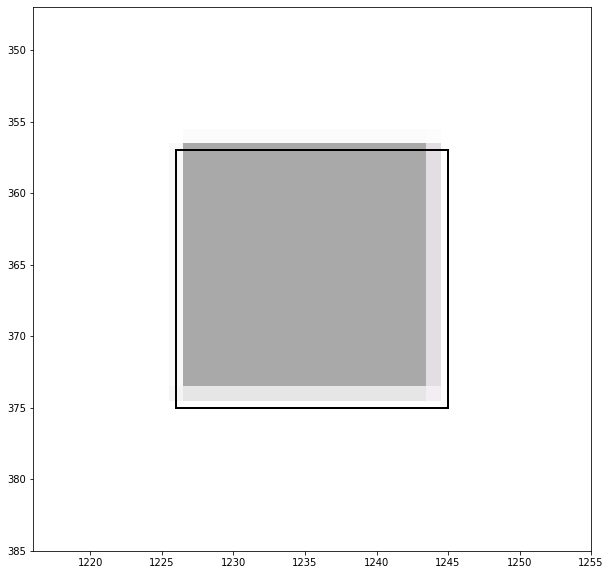

In [36]:
minr,minc,maxr,maxc= (357, 1226, 375, 1245)
fig, ax = plt.subplots()
#ax.imshow(image_label_overlay)
ax.imshow(image_org)
rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='black', linewidth=2)
ax.add_patch(rect)
ax.set_xlim(minc-10,maxc+10)
ax.set_ylim(maxr+10,minr-10)
plt.show()

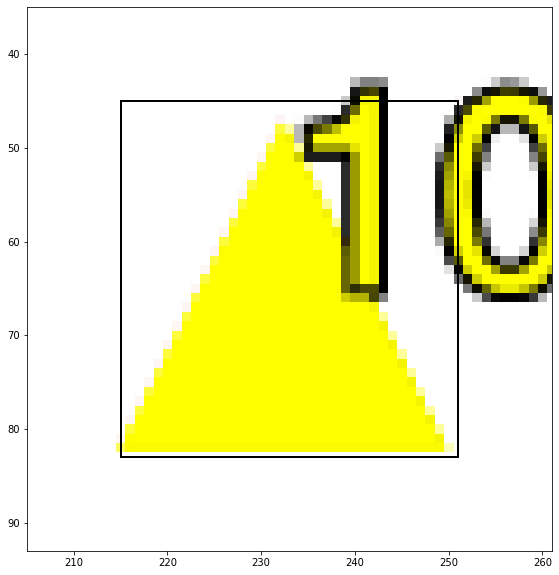

In [25]:
minr,minc,maxr,maxc= [45, 215, 83, 251]
fig, ax = plt.subplots()
#ax.imshow(image_label_overlay)
ax.imshow(image_org)
rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='black', linewidth=2)
ax.add_patch(rect)
ax.set_xlim(minc-10,maxc+10)
ax.set_ylim(maxr+10,minr-10)
plt.show()

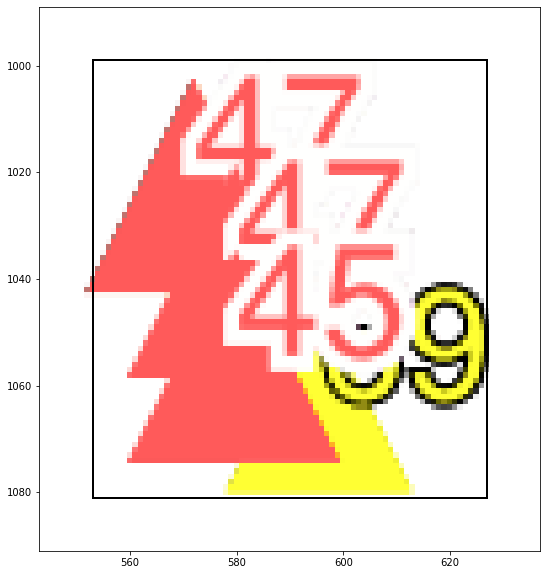

In [27]:
minr,minc,maxr,maxc= (999, 553, 1081, 627)
fig, ax = plt.subplots()
#ax.imshow(image_label_overlay)
ax.imshow(image_org)
rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='black', linewidth=2)
ax.add_patch(rect)
ax.set_xlim(minc-10,maxc+10)
ax.set_ylim(maxr+10,minr-10)
plt.show()